[原文](https://www.cnblogs.com/pinard/p/6016029.html)

# 1 数据介绍
循环发电场的数据，共有9568个样本数据，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。我们不用纠结于每项具体的意思。
我们的问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即:

　　　　PE=θ0+θ1∗AT+θ2∗V+θ3∗AP+θ4∗RH
　　　　而需要学习的，就是θ0,θ1,θ2,θ3,θ4这5个参数。

# 2 pandas读取数据 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

In [5]:
# 读取数据
data=pd.read_csv('files/data/python50-data/ccpp.csv')
# 数据格式
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# 3 准备数据

In [6]:
# 数据维度
data.shape 

(9568, 5)

结果是(9568, 5)。说明我们有9568个样本，每个样本有5列。

现在我们开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征。

In [8]:
X=data[['AT','V','AP','RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


准备样本输出y,用PE作为样本输出

In [9]:
y=data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# 4 划分训练集和测试集

把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集

In [12]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

#random_state就是随机seed，随机种子。因为sklearn中很多算法都含有随机的因素，为了进行可重复的训练，我需要固定一个random_state。

In [11]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7176, 4) (2392, 4) (7176, 1) (2392, 1)


# 5 运行scikit-learn的线性模型

In [14]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
#fit方法是用于从一个训练集中学习模型参数，其中就包括了归一化时用到的均值，标准偏差。

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

[ 447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


这样我们就得到了在步骤1里面需要求得的5个值。也就是说PE和其他4个变量的关系如下：

PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH

# 6 模型评价
我们需要评估我们的模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

我们看看我们的模型的MSE和RMSE，代码如下：

In [17]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.0804012021
RMSE: 4.48111606657


得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。
比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：

In [18]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.2089074701
RMSE: 4.81756239919


可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了。

# 7 交叉验证 
我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：

In [19]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.7955974619
RMSE: 4.56021901469


　可以看出，采用交叉验证模型的MSE比第6节的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，而第6节仅仅对25%的测试集做了MSE。两者的先决条件并不同。

# 8 画图观察结果
　这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：

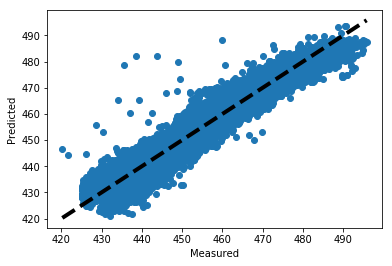

In [20]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()